In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from seaborn import heatmap

In [2]:
df_delta_extfp=pd.read_csv('delta_opioid_ExtFP_ready.csv').dropna()
df_delta_klekfp=pd.read_csv('delta_opioid_KlekFP_ready.csv').dropna()
df_delta_maccsfp=pd.read_csv('delta_opioid_MACCSFP_ready.csv').dropna()
df_kappa_extfp=pd.read_csv('kappa_opioid_ExtFP_ready.csv').dropna()
df_kappa_klekfp=pd.read_csv('kappa_opioid_KlekFP_ready.csv').dropna()
df_kappa_maccsfp=pd.read_csv('kappa_opioid_MACCSFP_ready.csv').dropna()
df_mu_extfp=pd.read_csv('mu_opioid_ExtFP_ready.csv').dropna()
df_mu_klekfp=pd.read_csv('mu_opioid_KlekFP_ready.csv').dropna()
df_mu_maccsfp=pd.read_csv('mu_opioid_MACCSFP_ready.csv').dropna()

In [75]:
def compare(dane, name):
    
    #print(name,'\n')
    
    X = dane[dane.columns[1:dane.shape[1]]].copy()
    y = dane[dane.columns[0]].copy()
    y[y <= 100] = 1
    y[y > 100] = 0
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)
    
    #print("logistic regression")
    logit = LogisticRegression(max_iter=1000).fit(X_train,y_train)
    y_pred_logit = logit.predict(X_test)
    #print(confusion_matrix(y_test,y_pred_logit))
    #print("accuracy: ", np.round(accuracy_score(y_test,y_pred_logit),decimals=2))
    #print("F1: ", np.round(f1_score(y_test,y_pred_logit),decimals=2),'\n')
    
    #print("random forest")
    forest = RandomForestClassifier().fit(X_train,y_train)
    y_pred_forest = forest.predict(X_test)
    #print(confusion_matrix(y_test,y_pred_forest))
    #print("accuracy: ", np.round(accuracy_score(y_test,y_pred_forest),decimals=2))
    #print("F1: ", np.round(f1_score(y_test,y_pred_forest),decimals=2),'\n')
    
    #print("SVM")
    svc = SVC().fit(X_train,y_train)
    y_pred_svc = svc.predict(X_test)
    #print(confusion_matrix(y_test,y_pred_svc))
    #print("accuracy: ", np.round(accuracy_score(y_test,y_pred_svc),decimals=2))
    #print("F1: ", np.round(f1_score(y_test,y_pred_svc),decimals=2),'\n')
    
    #print("naive bayes")
    bayes = BernoulliNB(binarize=None).fit(X_train,y_train)
    y_pred_bayes = bayes.predict(X_test)
    #print(confusion_matrix(y_test,y_pred_bayes))
    #print("accuracy: ", np.round(accuracy_score(y_test,y_pred_bayes),decimals=2))
    #print("F1: ", np.round(f1_score(y_test,y_pred_bayes),decimals=2),'\n')

    X_train, X_test, y_train, y_test = train_test_split(X,dane[dane.columns[0]],test_size=0.2,random_state=1,stratify=y)
    
    #print("linear regression")
    linear = LinearRegression().fit(X_train, y_train)
    y_pred_linear = linear.predict(X_test)

    #print("R^2: ", np.round(r2_score(y_test, y_pred_linear),decimals=2))
    #print("RMSE: ", np.round(np.sqrt(mean_squared_error(y_test, y_pred_linear)),decimals=2),'\n')
    
    #print("LASSO regression")
    lasso = Lasso().fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)

    #print("R^2: ", np.round(r2_score(y_test, y_pred_lasso),decimals=2))
    #print("RMSE: ", np.round(np.sqrt(mean_squared_error(y_test, y_pred_lasso)),decimals=2),'\n')
    
    #print("ridge regression")
    ridge = Ridge(alpha=4).fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)

    #print("R^2: ", np.round(r2_score(y_test, y_pred_ridge),decimals=2))
    #print("RMSE: ", np.round(np.sqrt(mean_squared_error(y_test, y_pred_ridge)),decimals=2),'\n')
    
    #print("classification after regression",'\n')

    y_test[y_test <= 100] = 1
    y_test[y_test > 100] = 0
    
    #print("linear regression")
    y_pred_linear[y_pred_linear <= 100] = 1
    y_pred_linear[y_pred_linear > 100] = 0
    #print("accuracy: ", np.round(accuracy_score(y_test, y_pred_linear),decimals=2))
    #print("F1: ", np.round(f1_score(y_test, y_pred_linear),decimals=2))
    
    #print("LASSO regression")
    y_pred_lasso[y_pred_lasso <= 100] = 1
    y_pred_lasso[y_pred_lasso > 100] = 0
    #print("accuracy: ", np.round(accuracy_score(y_test, y_pred_lasso),decimals=2))
    #print("F1: ", np.round(f1_score(y_test, y_pred_lasso),decimals=2))
    
    #print("ridge regression")
    y_pred_ridge[y_pred_ridge <= 100] = 1
    y_pred_ridge[y_pred_ridge > 100] = 0
    #print("accuracy: ", np.round(accuracy_score(y_test, y_pred_ridge),decimals=2))
    #print("F1: ", np.round(f1_score(y_test, y_pred_ridge),decimals=2))
    
    accuracy=np.array([np.round(accuracy_score(y_test,y_pred_logit),decimals=2),np.round(accuracy_score(y_test,y_pred_forest),decimals=2),np.round(accuracy_score(y_test,y_pred_svc),decimals=2),np.round(accuracy_score(y_test,y_pred_bayes),decimals=2),np.round(accuracy_score(y_test, y_pred_linear),decimals=2),np.round(accuracy_score(y_test, y_pred_lasso),decimals=2),np.round(accuracy_score(y_test, y_pred_ridge),decimals=2)])
    F1=np.array([np.round(f1_score(y_test,y_pred_logit),decimals=2),np.round(f1_score(y_test,y_pred_forest),decimals=2),np.round(f1_score(y_test,y_pred_svc),decimals=2),np.round(f1_score(y_test,y_pred_bayes),decimals=2),np.round(f1_score(y_test, y_pred_linear),decimals=2),np.round(f1_score(y_test, y_pred_lasso),decimals=2),np.round(f1_score(y_test, y_pred_ridge),decimals=2)])
    return(accuracy,F1)

In [77]:
delta_accuracy=np.array((compare(df_delta_extfp, "delta_extfp")[0],compare(df_delta_klekfp, "delta_klekfp")[0],compare(df_delta_maccsfp, "delta_maccsfp")[0]))
delta_F1=np.array((compare(df_delta_extfp, "delta_extfp")[1],compare(df_delta_klekfp, "delta_klekfp")[1],compare(df_delta_maccsfp, "delta_maccsfp")[1]))
kappa_accuracy=np.array((compare(df_kappa_extfp, "kappa_extfp")[0],compare(df_kappa_klekfp, "kappa_klekfp")[0],compare(df_kappa_maccsfp, "kappa_maccsfp")[0]))
kappa_F1=np.array((compare(df_kappa_extfp, "kappa_extfp")[1],compare(df_kappa_klekfp, "kappa_klekfp")[1],compare(df_kappa_maccsfp, "kappa_maccsfp")[1]))
mu_accuracy=np.array((compare(df_mu_extfp, "mu_extfp")[0],compare(df_mu_klekfp, "mu_klekfp")[0],compare(df_mu_maccsfp, "mu_maccsfp")[0]))
mu_F1=np.array((compare(df_mu_extfp, "mu_extfp")[1],compare(df_mu_klekfp, "mu_klekfp")[1],compare(df_mu_maccsfp, "mu_maccsfp")[1]))

C:\Users\adacz\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1323448922979.287, tolerance: 530826548.39397925
  model = cd_fast.enet_coordinate_descent(
C:\Users\adacz\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1110995376135.5308, tolerance: 589931412.3860856
  model = cd_fast.enet_coordinate_descent(
C:\Users\adacz\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22060933807.301758, tolerance: 589931412.3860856
  model = cd_fast.enet_coordinate_descent(
C:\Users\adacz\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

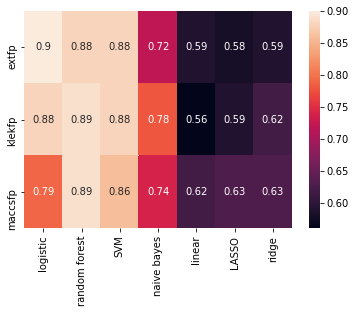

In [86]:
heatmap(delta_accuracy,annot=True,xticklabels=("logistic", "random forest","SVM","naive bayes","linear","LASSO","ridge"),yticklabels=("extfp","klekfp","maccsfp"))

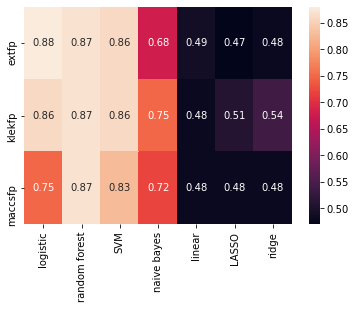

In [80]:
heatmap(delta_F1,annot=True,xticklabels=("logistic", "random forest","SVM","naive bayes","linear","LASSO","ridge"),yticklabels=("extfp","klekfp","maccsfp"))

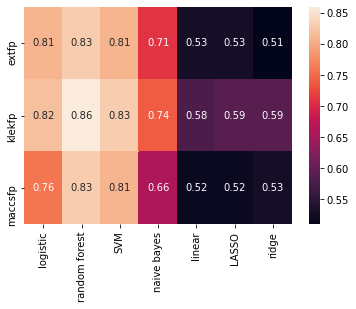

In [81]:
heatmap(kappa_accuracy,annot=True,xticklabels=("logistic", "random forest","SVM","naive bayes","linear","LASSO","ridge"),yticklabels=("extfp","klekfp","maccsfp"))

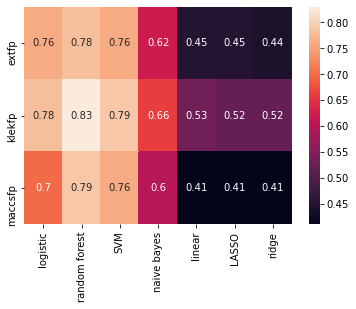

In [82]:
heatmap(kappa_F1,annot=True,xticklabels=("logistic", "random forest","SVM","naive bayes","linear","LASSO","ridge"),yticklabels=("extfp","klekfp","maccsfp"))

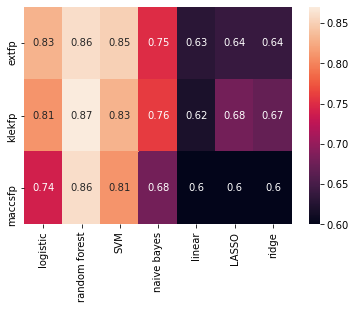

In [83]:
heatmap(mu_accuracy,annot=True,xticklabels=("logistic", "random forest","SVM","naive bayes","linear","LASSO","ridge"),yticklabels=("extfp","klekfp","maccsfp"))

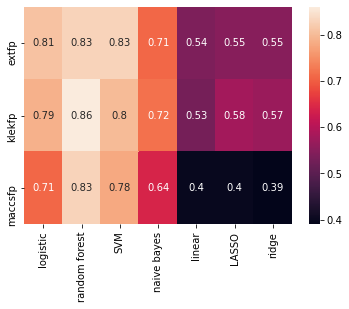

In [84]:
heatmap(mu_F1,annot=True,xticklabels=("logistic", "random forest","SVM","naive bayes","linear","LASSO","ridge"),yticklabels=("extfp","klekfp","maccsfp"))